a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

Columns in the dataset are:

1. step: represents a unit of time where 1 step equals 1 hour

2. type: type of online transaction

3. amount: the amount of the transaction

4. nameOrig: customer starting the transaction

5. oldbalanceOrg: balance before the transaction

6. newbalanceOrig: balance after the transaction

7. nameDest: recipient of the transaction

8. oldbalanceDest: initial balance of recipient before the transaction

9. newbalanceDest: the new balance of recipient after the transaction

10. isFraud: fraud transaction

Link: https://www.kaggle.com/ealaxi/paysim1/download

In [1]:
import pandas as pd 

df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [3]:
df.shape

(6362620, 11)

check for null values


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

no null values in the data

next check the dataset to see unique values for each dtype object

In [5]:
def print_unique(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')




In [6]:
print_unique(df)

type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest: ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [7]:
# having a look at the number of unique values
def unique_count(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {len(df[column].unique())}')


In [8]:
unique_count(df)

type: 5
nameOrig: 6353307
nameDest: 2722362


it is advisable to drop the columns nameOrig and nameDest since it wouldn't be advisable to label encode all the unique values, ie. 6353307 and 2722362 respectively since ML models are trained on numerical data and non_numeric data results inlow accuracy rates.

In [9]:
df1 = df.drop(['nameOrig', 'nameDest'], axis= 1)
df1.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [10]:
df1.shape

(6362620, 9)

some EDA

In [11]:
df1.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
# looking for imbalance in the type column
df1.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

no much imbalance can be seen

In [13]:
# do a pie plot to view distributions

type = df1.type.value_counts()

transactions = type.index
quantity = type.values

import plotly.express as px

fig = px.pie(df1, values = quantity, names= transactions, hole= 0, title= "Distribution of transaction types")
fig.show()

Which types of transactions are fraudilent

In [14]:
fraud = df1.loc[(df1.isFraud == 1)]
print(fraud.type.unique())
fraud.head()

['TRANSFER' 'CASH_OUT']


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [15]:
fraud.shape

(8213, 9)

despite being five types of transactions, fraud occurs in only two of them, ie. TRANSFER and CASH_OUT

In [16]:
print('\n The types of fraudulent transactions are ', fraud.type.unique())

transfers = fraud.loc[(fraud.isFraud == 1) & (fraud.type == 'TRANSFER')]
cash_out = fraud.loc[(fraud.isFraud == 1) & (fraud.type == 'CASH_OUT')]

print('\n Number of fraudulent transfers = ', len(transfers))
print('\n Number of fraudulent cash outs = ', len(cash_out))


 The types of fraudulent transactions are  ['TRANSFER' 'CASH_OUT']

 Number of fraudulent transfers =  4097

 Number of fraudulent cash outs =  4116


it appears the numbers are almost equal meaning the transactions are almost related in that one transfers then the other cashes out

# What determines whether the feature isflaggedFraud gets set or not

In [17]:
df1.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [18]:
flagged = df1.loc[df1.isFlaggedFraud == 1].type.unique()
flagged

print("The type of transactions in which isFlaggedFraud is set: ", flagged)

transfer_df = df1.loc[df1.type == 'TRANSFER']
flagged_df = df1.loc[df1.isFlaggedFraud == 1]
notflagged_df = df1.loc[df1.isFlaggedFraud == 0]

print('Min amount transacted when isFlaggedFraud is set= ', flagged_df.amount.min())
print("Max amount transacted in a TRANSFER where isFlaggedFraud is not set= ", transfer_df.loc[transfer_df.isFlaggedFraud == 0].amount.max())

The type of transactions in which isFlaggedFraud is set:  ['TRANSFER']
Min amount transacted when isFlaggedFraud is set=  353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set=  92445516.64


The 16 entries (out of 6 million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. The data is described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. In fact, as shown above, isFlaggedFraud can remain not set despite this condition being met.Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.

In [19]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
# discarding the isFlaggedFraud column

df2 = df1.drop("isFlaggedFraud", axis= 1)
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


normal and fraud distribution

In [21]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


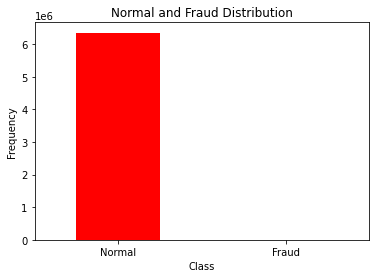

In [22]:
import matplotlib.pyplot as plt

check = pd.value_counts(df2.isFraud, sort= True)
check.plot(kind= 'bar', rot= 0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.show()

having a description of our data

In [23]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


try to visualize the average amount per class

In [24]:
not_fraud = df1[(df1.isFraud == 0)]
print(not_fraud.shape)
not_fraud.head()

(6354407, 9)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [25]:
is_fraud = df1[(df1.isFraud == 1)]

print(is_fraud.shape)
is_fraud.head()

(8213, 9)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


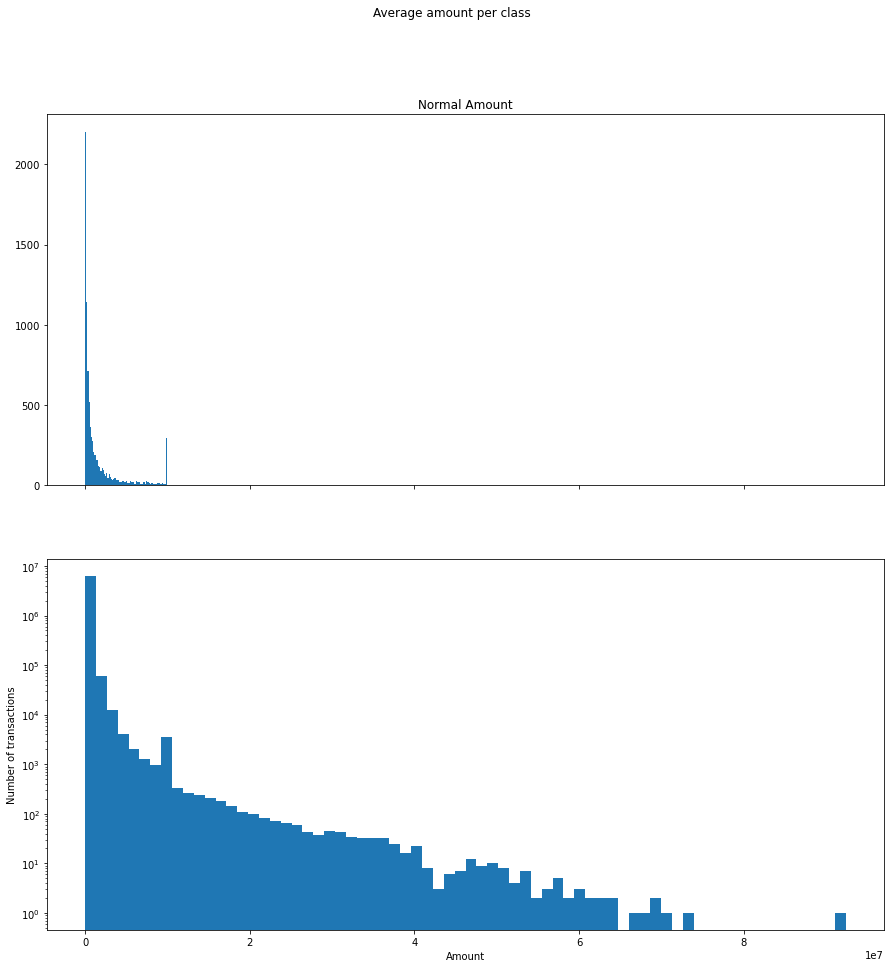

In [26]:

graph, (plot1, plot2) = plt.subplots(2, 1,figsize=(15, 15), sharex= True)

graph.suptitle("Average amount per class")
bins = 70

plot1.hist(is_fraud.amount, bins= bins)
plot1.set_title("Fraud Amount")

plot2.hist(not_fraud.amount, bins= bins)
plot1.set_title("Normal Amount")

plt.xlabel("Amount")
plt.ylabel("Number of transactions")
plt.yscale("log")
plt.show()

having a look at the correlation between variables

In [27]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [28]:
correlation = df2.corr()
print(correlation.isFraud.sort_values(ascending= False))

isFraud           1.000000
amount            0.076688
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [29]:
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


this can further be expressed in form of a gragical representation



<AxesSubplot:>

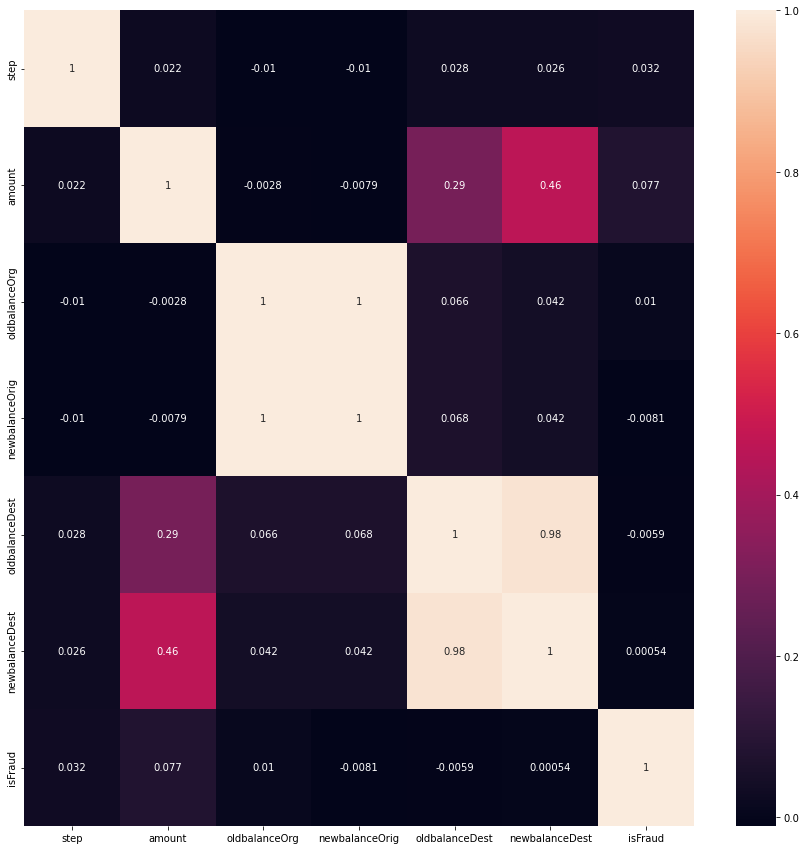

In [30]:
import seaborn as sns

plt.figure(figsize= (15,15))

sns.heatmap(correlation, annot= True)

next transfrom type column into numeric values


In [31]:
# first have a look at unique values of each column

def print_unique(df):
    for column in df:
            print(f'{column}: {df[column].unique()}')


print_unique(df2)

step: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 

In [32]:
# try using sklearn label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3 = df2.copy()

# type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
df3["type"] = le.fit_transform(df3["type"])
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [34]:
print_unique(df3)

step: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 

resulting encodings are:
from  type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

to type: [3 4 1 2 0] 


In [35]:
transfer_encoded = df3.loc[df3.type == 4]
transfer_encoded.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,4,181.00,181.00,0.0,0.00,0.00,1
19,1,4,215310.30,705.00,0.0,22425.00,0.00,0
24,1,4,311685.89,10835.00,0.0,6267.00,2719172.89,0
58,1,4,62610.80,79114.00,16503.2,517.00,8383.29,0
78,1,4,42712.39,10363.39,0.0,57901.66,24044.18,0


In [36]:
transfer = df2.loc[df2.type == "TRANSFER"]
transfer.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0


In [37]:
payment_encoded = df3.loc[df3.type == 3]
payment_encoded.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,3,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,3,7107.77,183195.0,176087.23,0.0,0.0,0


In [38]:
payment =  df2.loc[df2.type == "PAYMENT"]
payment.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


model building

In [44]:
df3.isFraud[(df3.isFraud == 0)].value_counts()

0    6354407
Name: isFraud, dtype: int64

In [45]:
df3.isFraud[(df3.isFraud == 1)].value_counts()

1    8213
Name: isFraud, dtype: int64

In [46]:
df3.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


Due to the size of the dataset, it might not be possible to do model evaluation with the whole dataset, hence consider sampling to create a smaller dataet

In [47]:
df3.shape

(6362620, 8)

In [48]:
# condition = df3.isFraud[(df3.isFraud == 1)].value_counts() >= 500
# condition

In [49]:
# true_index = condition[condition == True].index
# true_index

In [50]:
eval_df = df3.sample(n= 1500)
print(eval_df.shape)
eval_df.head()

(1500, 8)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5490717,380,0,5590.82,7005700.44,7011291.26,10501.68,4910.86,0
2822845,226,0,290771.73,8455.00,299226.73,1481883.64,1191111.90,0
117116,11,3,18920.95,41952.00,23031.05,0.00,0.00,0
5366965,375,0,293925.14,2397.00,296322.14,1486188.65,1192263.51,0
1766894,162,1,12030.79,0.00,0.00,490456.12,502486.91,0


In [51]:
eval_df.isFraud.unique()

array([0, 1], dtype=int64)

In [52]:
eval_df.isFraud.value_counts()

0    1496
1       4
Name: isFraud, dtype: int64

In [53]:
eval_df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000
mean,245.041333,1.718000,1.798118e+05,7.791893e+05,7.972726e+05,1.282238e+06,1.417148e+06,0.002667
std,136.329569,1.353895,4.462406e+05,2.817939e+06,2.852961e+06,4.720179e+06,4.823289e+06,0.051588
min,7.000000,0.000000,8.923000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,160.750000,1.000000,1.346177e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,250.000000,1.000000,7.963836e+04,1.223900e+04,0.000000e+00,1.543705e+05,2.614779e+05,0.000000
75%,333.250000,3.000000,2.110062e+05,1.025860e+05,1.261472e+05,1.039343e+06,1.234515e+06,0.000000
max,714.000000,4.000000,1.000000e+07,3.020452e+07,3.031968e+07,1.426622e+08,1.427390e+08,1.000000


In [54]:
X_eval = eval_df.drop("isFraud", axis = 1)
y_eval = eval_df.isFraud

In [55]:
y_eval.value_counts()

0    1496
1       4
Name: isFraud, dtype: int64

y is highly imbalanced

use random over ssampler

In [75]:
from imblearn.over_sampling import RandomOverSampler


# smote =  SMOTE(sampling_strategy= "minority")

ros = RandomOverSampler(random_state=0)
X_sm, y_sm = ros.fit_resample(X_eval, y_eval)

In [77]:
from collections import Counter
print(sorted(Counter(y_sm).items()))

[(0, 1496), (1, 1496)]


In [79]:
from sklearn.model_selection import train_test_split

X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_sm, y_sm, test_size= 0.2, random_state= 10)

model evaluation and selection

In [80]:
y_train_eval.head()

725     0
1525    1
2822    1
599     0
2856    1
Name: isFraud, dtype: int64

In [81]:

import warnings
warnings.filterwarnings('ignore')

In [82]:
# import required classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import IsolationForest
import numpy as np

In [86]:

# evaluate the best classifier using a function
# hyper parameter tuning

def find_best_model_using_gridsearchcv(X_train_eval, y_train_eval):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'PassiveAggressiveRegressor': {
        'model': PassiveAggressiveRegressor(),
        'params':{
                'C' : np.logspace(-4, 4, 20),
                'fit_intercept': [True, False],
                'early_stopping': [True, False],
                'shuffle': [True, False],
                'epsilon': np.logspace(-4, 4, 20),
                'warm_start': [True, False],
                'average': [True, False]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       },
       'decision_tree_classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': range(1, 10),
            'min_samples_split': range(1, 10),
            'min_samples_leaf': range(1, 5)
        }
       }
    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train_eval, y_train_eval)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [87]:
find_best_model_using_gridsearchcv(X_train_eval, y_train_eval)


[20:51:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:37] WARNING:

,model,best_score,best_params
0,linear_regression,0.297820,{'normalize': True}
1,lasso,0.297238,"{'alpha': 1, 'selection': 'cyclic'}"
2,PassiveAggressiveRegressor,-1.023753,"{'C': 0.0001, 'average': True, 'early_stopping..."
3,decision_tree,1.000000,"{'criterion': 'mse', 'splitter': 'random'}"
4,XGBoost,1.000000,"{'gamma': 0.5, 'max_depth': 3, 'min_child_weig..."
5,LogisticRegression,1.000000,"{'C': 0.012742749857031334, 'solver': 'lbfgs'}"
6,RandomForestClassifier,1.000000,"{'max_features': 'auto', 'n_estimators': 20}"
7,decision_tree_classifier,1.000000,"{'criterion': 'entropy', 'max_depth': 8, 'min_..."


5 classifiers have an accuracy of 1 hence lets work with the random forest classifier

In [98]:
df3.columns

In [99]:
#  define X and y 
X = df3.drop("isFraud", axis= 1)
y = df3.isFraud

In [101]:
#  perfomr a train_test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [102]:
y_train.value_counts()

0    5083553
1       6543
Name: isFraud, dtype: int64

In [103]:
y_test.value_counts()

0    1270854
1       1670
Name: isFraud, dtype: int64

In [104]:
rf = RandomForestClassifier(max_features= 'auto', n_estimators= 20)
rf

RandomForestClassifier(max_features='auto', n_estimators=20)

In [105]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [112]:
rf.score(X_test, y_test)

0.9996895932807555

use cross_val_score to evaluate model



confusion matrix and classification report



In [113]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.98      0.78      0.87      1670

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [114]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1270826,      28],
       [    367,    1303]], dtype=int64)

Text(78.0, 0.5, 'Truth')

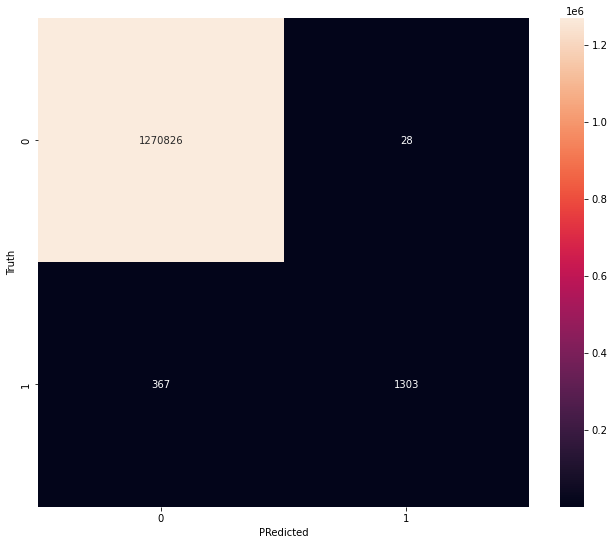

In [115]:
#  express the confusion matrix graphically
import seaborn as sn

plt.figure(figsize= (11,9))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("PRedicted")
plt.ylabel("Truth")



In [116]:
# save mdoel to pickle file
import pickle
with open('fraud.pickle', 'wb') as f:
    pickle.dump(rf, f)

resulting encodings are:
from  type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

to type: [3 4 1 2 0] 

In [117]:
# try predictions from user input

In [118]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [119]:
def Fraud(step, type, amount, old_origin, new_origin, old_dest, new_dest):
    x = np.zeros(len(X.columns))

    x[0]: step
    x[1]: type
    x[2]: amount
    x[3]: old_origin
    x[4]: new_origin
    x[5]: old_dest
    x[6]: new_dest

    fr = rf.predict([x])[0]


    if fr == 1:
        print("Fraudulent transaction")
    else:
        print("Normal transaction")

        

In [120]:
Fraud(1, 3, 9839.64, 170136, 160296.36, 0, 0)

Fraudulent transaction


In [121]:
Fraud(1, 3, 9839.64, 170136, 160296.36, 24482, 0)

Fraudulent transaction


In [122]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))